In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



def price_sensitive(prize):
    if prize < 1000:
        return 1
    elif 1000 <= prize < 1050:
        return 0.75
    elif 1050 <= prize < 1100:
        return 0.5
    elif 1100 <= prize < 1150:
        return 0.25
    elif 1150 <= prize < 1200:
        return 0
    elif 1200 <= prize < 1250:
        return -0.5
    elif 1250 <= prize < 1300:
        return -1
    
    elif 1300 <= prize < 1350:
        return -1.5
    elif 1350 <= prize < 1380:
        return -2
    elif 1380 <= prize <= 1400:
        return -2.5
    
    elif 1400 < prize <= 1425:
        return -3
    elif 1425 < prize <= 1450:
        return -3.5
    elif 1450 < prize <= 1470:
        return -4
    elif 1470 < prize <= 1490:
        return -4.5
    elif 1490 < prize <= 1500:
        return -5
    
    elif 1500 < prize <= 1510:
        return -5.5
    elif 1510 < prize <= 1520:
        return -6
    elif 1520 < prize <= 1530:
        return -6.5
    elif 1530 < prize <= 1540:
        return -7
    elif 1540 < prize <= 1550:
        return -7.5
    
    elif 1550 < prize <= 1575:
        return -9
    elif 1575 <= prize:
        return -10

def preprocess_df(df):
    for line in range(0, len(df)):
        for pro in pro_score.keys():
            if pro in df["pro"][line]:
                df.loc[line, "desireScore"] += pro_score[pro]
        for con in con_score.keys():
            if con in df["con"][line]:
                df.loc[line, "desireScore"] += con_score[con]
        
        df.loc[line, "price"] += 80
        df.loc[line, "desireScore"] += price_sensitive(df.loc[line, "price"])
        
    return df
    
    
def scatterplot_text(x, y, text, data, *args, **kwargs):
    sns.scatterplot(x, y, data=data, *args, **kwargs)
    for line in range(0, len(data)):
        plt.text(data[x][line]+5,
                  data[y][line],
                  data[text][line],
                  horizontalalignment='left',
                  size='medium',
                  color='black')
        print(
            "{}: \n\tpro:{}\n\tcon:{}\n".format(
                data["name"][line],
            data["pro"][line],
            data["con"][line])
        )
    
    plt.plot([1000, np.mean(df[x])*1.2], 
             [35, np.mean(df[y])*1.2], "g--")
    plt.grid()
    plt.show()


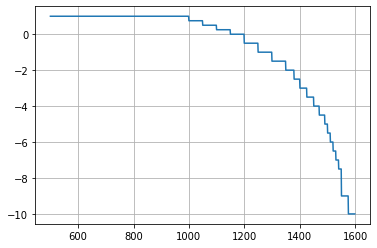

In [118]:
plt.plot(range(500, 1600), [price_sensitive(p) for p in range(500, 1600)])
plt.grid()

# Scoring rule

- average: 5
- based pro and con: +_ 1~3
- based on price/area: +_ 0~1
- based on mobil: +_ 0~0.5


In [164]:
pro_score = {
    "next to asian market": 0.6,
    "near asian market": 0.5,
    "next to asian res": 1,
    "near asian res": 0.5,
    
    "next to congyu": 0.8,
    "next to shangsu": 0.8,
    "near congyu": 0.5,
    "near shangsu": 0.5,
    
    "next to park": 0.6,
    "near park": 0.4, 
    
    "next to Ubahn": 0.5,
    "next to market": 0.4,
    
    "nice bacony": 0.7,
    "nice layout": 1,
    "nice mobi": 2,
    "nice küche": 0.5,
    
    "nice building": 0.5,
    "high value": 0.2,
}

con_score = {
    "no bacony": -1,  # with replacement
    
    "far to shangsu": -2,
    "far to congyu": -2,    
    "possion": -2,
    
    "low value": -0.5,
    "far to Ubahn": -0.2,
}

In [165]:
data = [
    [4.8,"app",  "gepflegte2", 1310, 53, "1500 nach; ",  "no bacony with EG",      "next to Ubahn; next to park; next to congyu; "],
    [5,  "app",  "hochgross",  1345, 38, "",             "far to shangsu; possion; low value", "next to park; next to market; nice küche; nice bacony; "],
    [5,  "app",  "schwabingG", 1450, 50, "",             "",                       "near asian market; near aisan res, near shangsu; nice mobi; nice building; nice layout"],
    [4,  "ref",  "helle22",    1500, 54, "2 Jahre, no internet","",                "nice bacony; nice building; next to market; high value"],
    [1.5,  "app",  "ab9",        1330, 49, "3000 nach, awful bacony",    "bad light, unmobil",     "nice layout; next to Ubahn; next to park, next to market"],
    [4,  "app",  "schwabingT", 1247, 40, "2 Jahre",      "far to congyu, far to Ubahn", "near shangsu, next to market"],
    [5,  "ref",  "moderne2",   1540, 49.7, "",           "far to shangsu",         "near park; nice layout, next to market; "], 
    [4,  "app",  "helle&r",    1390, 56, "200 nach",     "no lift with 1 floor, old building", "next to Ubahn; next to market; near park, nice layout"],
    [5,  "app",  "möbschön",   1170, 39, "kvr",          "",                         "near shangsu, near congyu, next to market, next to Ubahn, cheap" ],
    # [4,  "app",  "schwabingT/helle1", 1148, 40, "2 Jahre", "far to congyu, far to Ubahn", "near shangsu, next to market"],
    [5,  "app",  "Sonnige3",   1350, 78, "",             "far to shangsu",           "nice building, nice layout, high value"],
    [5,  "app",  "ruhige2.5",  1299, 82, "",             "far to shangsu, no bacony with workroom", "nice layout, next to market, next to Ubahn, high value"],
    [0,  "ref",  "moderne&h",  1230, 55, "extrem far to shangsu", "far to shangsu, far to congyu", "nice layout"],
    [5,  "",     "nette2",     1230, 63, "",             "far to shangsu", "near congyu, next to market"]
]

In [166]:
df = pd.DataFrame(data, columns=["desireScore", "label", "name", "price", "area", "spe", "con", "pro"])
df = preprocess_df(df)

In [167]:
df = df.sort_values(["desireScore"], ascending=False)
df = df.reset_index(drop=True)
df

,desireScore,label,name,price,area,spe,con,pro
0,5.9,app,möbschön,1250,39.0,kvr,,"near shangsu, near congyu, next to market, nex..."
1,3.2,app,gepflegte2,1390,53.0,1500 nach;,no bacony with EG,next to Ubahn; next to park; next to congyu;
2,3.0,app,schwabingG,1530,50.0,,,"near asian market; near aisan res, near shangs..."
3,2.4,,nette2,1310,63.0,,far to shangsu,"near congyu, next to market"
4,2.3,app,helle&r,1470,56.0,200 nach,"no lift with 1 floor, old building","next to Ubahn; next to market; near park, nice..."
5,2.1,app,ruhige2.5,1379,82.0,,"far to shangsu, no bacony with workroom","nice layout, next to market, next to Ubahn, hi..."
6,1.2,app,schwabingT,1327,40.0,2 Jahre,"far to congyu, far to Ubahn","near shangsu, next to market"
7,1.2,app,Sonnige3,1430,78.0,,far to shangsu,"nice building, nice layout, high value"
8,1.0,app,ab9,1410,49.0,"3000 nach, awful bacony","bad light, unmobil","nice layout; next to Ubahn; next to park, next..."
9,-0.3,app,hochgross,1425,38.0,,far to shangsu; possion; low value,next to park; next to market; nice küche; nice...


ruhige2.5: 
	pro:nice layout, next to market, next to Ubahn, high value
	con:far to shangsu, no bacony with workroom

Sonnige3: 
	pro:nice building, nice layout, high value
	con:far to shangsu

nette2: 
	pro:near congyu, next to market
	con:far to shangsu

helle&r: 
	pro:next to Ubahn; next to market; near park, nice layout
	con:no lift with 1 floor, old building

moderne&h: 
	pro:nice layout
	con:far to shangsu, far to congyu

helle22: 
	pro:nice bacony; nice building; next to market; high value
	con:

gepflegte2: 
	pro:next to Ubahn; next to park; next to congyu; 
	con:no bacony with EG

schwabingG: 
	pro:near asian market; near aisan res, near shangsu; nice mobi; nice building; nice layout
	con:

moderne2: 
	pro:near park; nice layout, next to market; 
	con:far to shangsu

ab9: 
	pro:nice layout; next to Ubahn; next to park, next to market
	con:bad light, unmobil

schwabingT: 
	pro:near shangsu, next to market
	con:far to congyu, far to Ubahn

möbschön: 
	pro:near shangsu, near cong

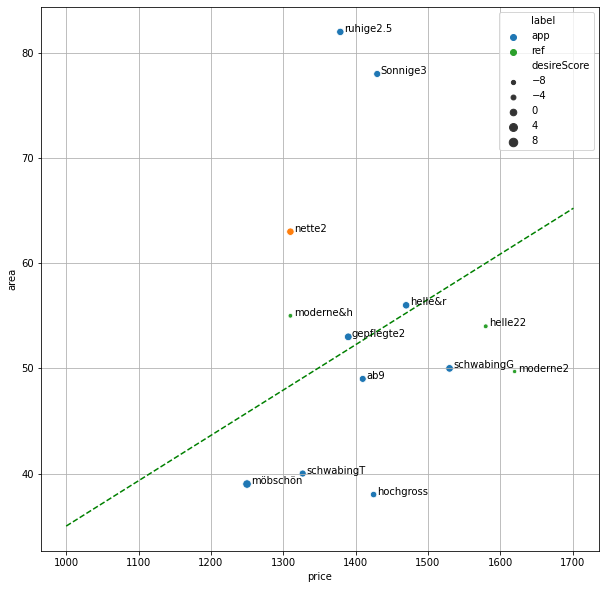

In [168]:
df = df.sort_values(["area"], ascending=False)
df = df.reset_index(drop=True)
plt.figure(figsize=(10, 10))
scatterplot_text("price", "area", "name", hue="label", size="desireScore", data=df)